## Standarization and Normalization

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/house_price_prediction.csv",usecols=['Id','MSSubClass','LotArea','SaleCondition','SalePrice'])     # using required columns
df.head()

,Id,MSSubClass,LotArea,SaleCondition,SalePrice
0,1,60,8450,Normal,208500
1,2,20,9600,Normal,181500
2,3,60,11250,Normal,223500
3,4,70,9550,Abnorml,140000
4,5,60,14260,Normal,250000


## Pre-Processing

In [3]:
# shape of the dataset
df.shape

(1460, 5)

In [4]:
# description of dataset
df.describe()

,Id,MSSubClass,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,180921.195890
std,421.610009,42.300571,9981.264932,79442.502883
min,1.000000,20.000000,1300.000000,34900.000000
25%,365.750000,20.000000,7553.500000,129975.000000
50%,730.500000,50.000000,9478.500000,163000.000000
75%,1095.250000,70.000000,11601.500000,214000.000000
max,1460.000000,190.000000,215245.000000,755000.000000


In [5]:
# checking if there any missing values
df.isna().sum()

Id               0
MSSubClass       0
LotArea          0
SaleCondition    0
SalePrice        0
dtype: int64

In [6]:
# dropping duplicates values from dataset
df.drop_duplicates(keep=False,inplace=True)

In [7]:
x=df.drop(columns=['SaleCondition'])
y=df['SaleCondition']

# Training The Data

In [8]:
# Training the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train.head()  # top  5 rows of the dataset

,Id,MSSubClass,LotArea,SalePrice
254,255,20,8400,145000
1066,1067,60,7837,178000
638,639,30,8777,85000
799,800,50,7200,175000
380,381,50,5000,127000


# Standarization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)

Observation -


1.   Scaling the data into similar scales for machine learning process
2.   fitting x_train and transforming x_train and x_test



In [11]:
x_train_std  # scaled data in the form of array

array([[-1.11928402, -0.8667643 , -0.21289571, -0.47185427],
       [ 0.79046412,  0.07410996, -0.26524463, -0.04456195],
       [-0.21615189, -0.63154574, -0.17784146, -1.24874939],
       ...,
       [ 1.32669882, -0.8667643 , -0.23409563, -0.86030183],
       [ 0.30597137, -0.16110861, -0.28337613,  0.11016966],
       [ 0.93157852,  1.48542135, -0.65139925, -0.09635496]])

In [12]:
# Converting array into dataframe
x_train_std=pd.DataFrame(x_train_std,columns=x_train.columns)
x_test_std=pd.DataFrame(x_test_std,columns=x_test.columns)

In [13]:
np.round(x_train.describe(),1)   # describing the data upto to 1 decimal scales

,Id,MSSubClass,LotArea,SalePrice
count,1168.0,1168.0,1168.0,1168.0
mean,730.9,56.8,10689.6,181441.5
std,425.4,42.5,10759.4,77263.6
min,1.0,20.0,1300.0,34900.0
25%,360.8,20.0,7587.2,130000.0
50%,732.5,50.0,9600.0,165000.0
75%,1101.8,70.0,11700.0,214925.0
max,1460.0,190.0,215245.0,745000.0


In [14]:
np.round(x_train_std.describe(),1)   # describing the data upto to 1 decimal scales

,Id,MSSubClass,LotArea,SalePrice
count,1168.0,1168.0,1168.0,1168.0
mean,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-1.7,-0.9,-0.9,-1.9
25%,-0.9,-0.9,-0.3,-0.7
50%,0.0,-0.2,-0.1,-0.2
75%,0.9,0.3,0.1,0.4
max,1.7,3.1,19.0,7.3


Text(0.5, 1.0, 'scaled Data')

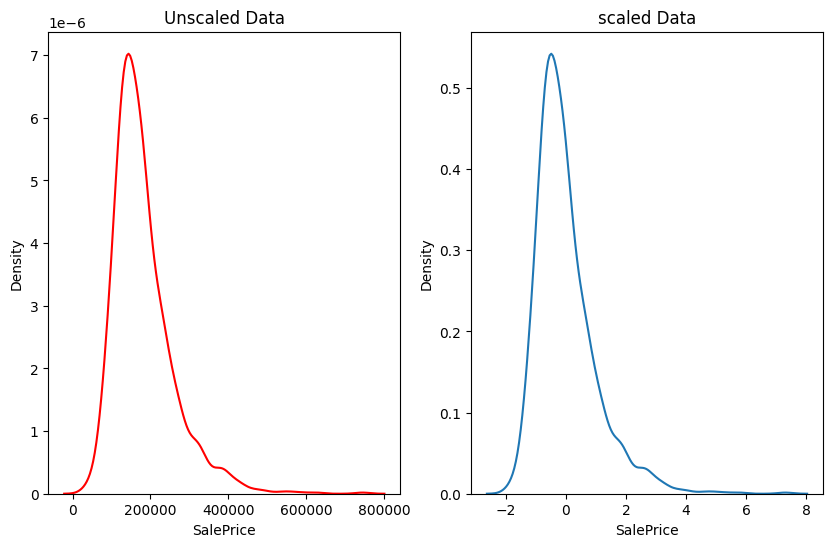

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.kdeplot(x_train['SalePrice'],color='red')
plt.ylabel('Density')
plt.xlabel('SalePrice')
plt.title('Unscaled Data')
plt.subplot(122)
sns.kdeplot(x_train_std['SalePrice'])
plt.ylabel('Density')
plt.xlabel('SalePrice')
plt.title('scaled Data')

In [16]:
# Validating Results
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression()
lr_std=LogisticRegression()

In [18]:
lr.fit(x_train,y_train)
lr_std.fit(x_test,y_test)

LogisticRegression()

In [19]:
y_pred=lr.predict(x_test)
y_pred_std=lr_std.predict(x_test_std)

In [20]:
#  Checking scores or accuracy
from sklearn.metrics import accuracy_score
print('actual',accuracy_score(y_test,y_pred))
print('scaled',accuracy_score(y_test,y_pred_std))

actual 0.797945205479452
scaled 0.25


Observations -


1.   Data is scaled into similar scales
2.   Before data was scaled accuracy of data was good but after the data is scaled it's accuracy low down



## Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
scaling.fit(x_train)
x_train_norm=scaling.transform(x_train)
x_test_norm=scaling.transform(x_test)

Observation -


1.   Scaling the data into similar scales for machine learning process
2.   fitting x_train and transforming x_train and x_test
3.  Formula - v = ((x - min_data) / max_data - min_data)) * (new_max_data - new_min_data)


In [22]:
x_train_norm=pd.DataFrame(x_train_norm,columns=x_train.columns)
x_test_norm=pd.DataFrame(x_test_norm,columns=x_test.columns)

In [23]:
np.round(x_train.describe(),1)  # descrbing the data upto 1 decimal scales

,Id,MSSubClass,LotArea,SalePrice
count,1168.0,1168.0,1168.0,1168.0
mean,730.9,56.8,10689.6,181441.5
std,425.4,42.5,10759.4,77263.6
min,1.0,20.0,1300.0,34900.0
25%,360.8,20.0,7587.2,130000.0
50%,732.5,50.0,9600.0,165000.0
75%,1101.8,70.0,11700.0,214925.0
max,1460.0,190.0,215245.0,745000.0


In [24]:
np.round(x_train_norm.describe(),1)  # descrbing the data upto 1 decimal scales

,Id,MSSubClass,LotArea,SalePrice
count,1168.0,1168.0,1168.0,1168.0
mean,0.5,0.2,0.0,0.2
std,0.3,0.3,0.1,0.1
min,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.0,0.1
50%,0.5,0.2,0.0,0.2
75%,0.8,0.3,0.0,0.3
max,1.0,1.0,1.0,1.0


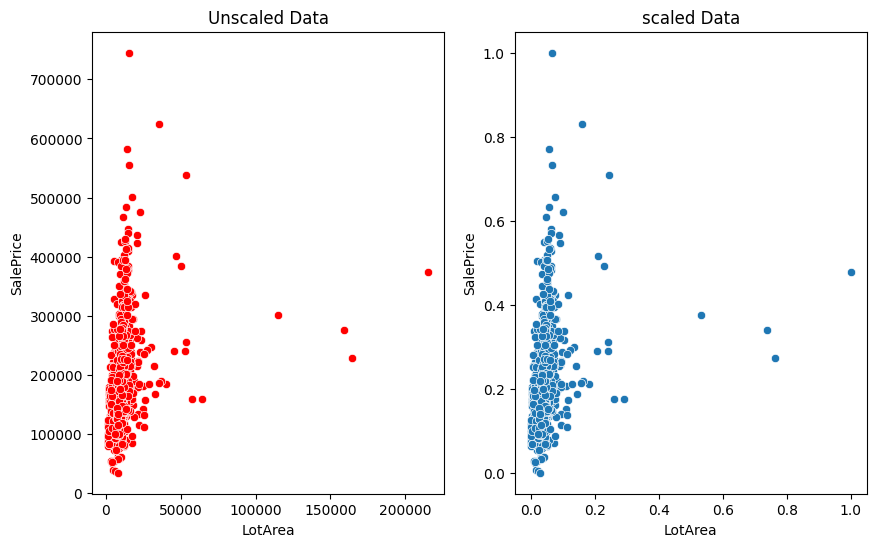

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Unscaled Data')
sns.scatterplot(x=x_train['LotArea'],y=x_train['SalePrice'],color='red')
plt.subplot(122)
sns.scatterplot(x=x_train_norm['LotArea'],y=x_train_norm['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('scaled Data')
plt.show()

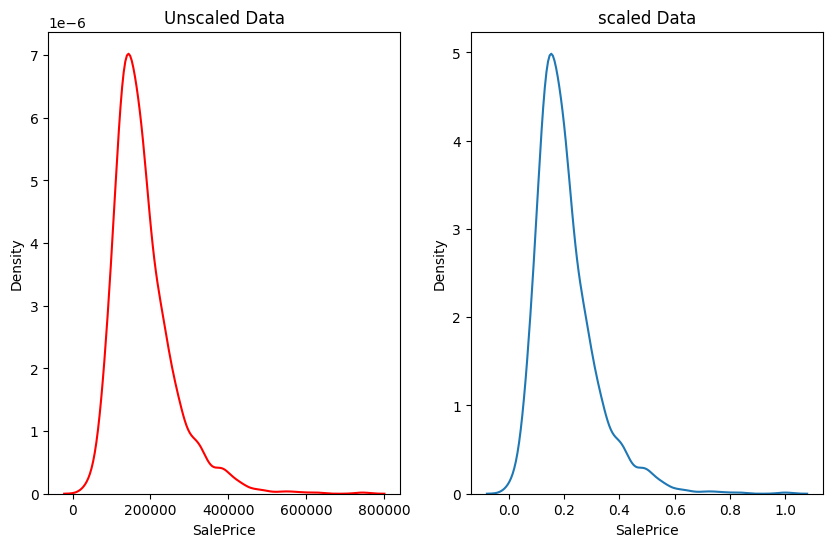

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.kdeplot(x_train['SalePrice'],color='red')
plt.ylabel('Density')
plt.xlabel('SalePrice')
plt.title('Unscaled Data')
plt.subplot(122)
sns.kdeplot(x_train_norm['SalePrice'])
plt.ylabel('Density')
plt.xlabel('SalePrice')
plt.title('scaled Data')
plt.show()

In [27]:
# Validating Results
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()
lr_norm=LogisticRegression()

In [29]:
lr.fit(x_train,y_train)
lr_norm.fit(x_test,y_test)

LogisticRegression()

In [30]:
y_pred_normalization=lr.predict(x_test)
y_pred_norm=lr_norm.predict(x_test_norm)

In [31]:
from sklearn.metrics import accuracy_score
print('actual',accuracy_score(y_test,y_pred_normalization))
print('scaled',accuracy_score(y_test,y_pred_norm))

actual 0.797945205479452
scaled 0.4383561643835616


Observations -


1.   Data is scaled into similar scales
2.   Before data was scaled accuracy of data was good but after the data is scaled it's accuracy low down
3.  Comparing both methods Standarization and Normalization, Normalization giving little bit good accuracy then Standarization
4.  But, still Beforing scaling data accuracy was good then after scaling